# Version 0

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## 1. Lorenz Equations


<!-- <ol>
<li>Item 1</li>
<li>Item 2 ( we can type 1. and the markdown will automatically numerate them) </li>
    
<li><p>First Item</p> -->
The Lorenz Equations are a set of (ordinary differential) equations used to describe 

Lorenz Equations:
<ul>
<li>$ \frac{\mathrm{d} x}{\mathrm{d} t} = \sigma (y - x) $</li>
<li>$\frac{\mathrm{d} y}{\mathrm{d} t} = x (\rho - z) - y$</li>
<li>$\frac{\mathrm{d} z}{\mathrm{d} t} = x y - \beta z$</li>

  The constants $\sigma$(s), $\rho$ (r), and $\beta$ (b) are system parameters proportional to the Prandtl number, Rayleigh number, and certain physical dimensions of the layer itself.

In [5]:
## Set Lorenz System Parameters ##
s=10
r=28
b=2.667
init = (s,r,b)

In [6]:
## Building a Lorenz Attractor ##
def lorenz(x, y, z, params = (10, 28, 2.667)):
    s = params[0]
    r = params[1]
    b = params[2]
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


In [7]:
# dt = 0.01
# num_steps = 10000


# # Need one more for the initial values
# xs = np.empty(num_steps + 1)
# ys = np.empty(num_steps + 1)
# zs = np.empty(num_steps + 1)

# # Set initial values
# init_a = (0., 1., 1.05)
# init_b = (0., 1.1, 1.05)

def evolve_system(system = lorenz,
                  parameters = (10, 28, 2.667),
                  num_steps = 10000, 
                  dt = .01, 
                  init = (0., 1., 1.05)):
    """
    Given a chaotic system and associated parameters
    
    Returns: "developed" system
    """
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)
    
    xs[0], ys[0], zs[0] = init

                  
    #HashtagNumericalIntegration. This is (forward) Euler's Method, but I'd like to provide the option for choosing how this function evolves the system
    for i in range(num_steps):
        x_dot, y_dot, z_dot = system(xs[i], ys[i], zs[i], params = parameters)
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    return(xs, ys, zs)

                  


C:\Users\mchuf\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  import sys


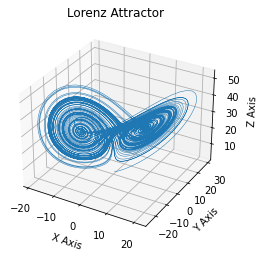

In [9]:
def plot_attractor(attractor):
    """
    Given: a set of coordinates (x,y,z) for a developed attractor
    Returns: 3D plot of the attractor
    """
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(attractor[0], attractor[1], attractor[2], lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("Lorenz Attractor")

    plt.show()

    
attractor = evolve_system()
plot_attractor(attractor)

## 2. Some Attractor Experiments

#### 2A. Changing Attractor Parameters

C:\Users\mchuf\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  import sys


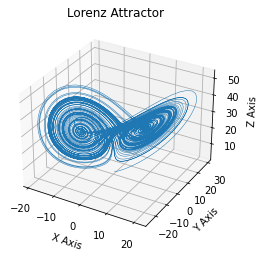

C:\Users\mchuf\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  import sys


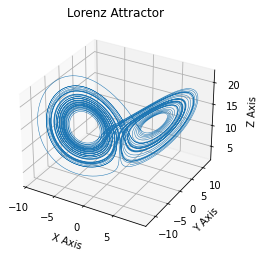

In [10]:
# What happens when we change Parameters
param_a = (10, 28, 2.667)
param_b = (5, 14, 1.334)
# # intial conditions
# init_a = (0., 1., 1.05)
# init_b = (0., 1.1, 1.05)

attractor_a = evolve_system(system = lorenz,
                  parameters = param_a,
                  num_steps = 10000, 
                  dt = .01)

attractor_b = evolve_system(system = lorenz,
                  parameters = param_b,
                  num_steps = 10000, 
                  dt = .01,
                  init = (1, 2, 3))
plot_attractor(attractor_a)
plot_attractor(attractor_b)


#### 2B. Changing Initial Conditions 

C:\Users\mchuf\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  import sys


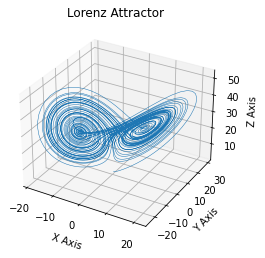

C:\Users\mchuf\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  import sys


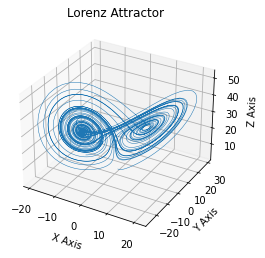

In [15]:
# What happens when we change intial conditions (Same parameters)?
params = (10, 28, 2.667)
# param_b = (10, 28, 0)
# # intial conditions
init_a = (0., 1., 1.05)
init_b = (0., 3, 1.05)

n = 5000

attractor_a = evolve_system(system = lorenz, 
                  num_steps = n, 
                  dt = .01, 
                  init = init_a)

attractor_b = evolve_system(system = lorenz, 
                  num_steps = n, 
                  dt = .01, 
                  init = init_b)

plot_attractor(attractor_a)
plot_attractor(attractor_b)

## 3. Different graphs of the Lorenz Attractor

In [16]:
n = 5000
attractor = evolve_system(num_steps = n)

C:\Users\mchuf\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  import sys


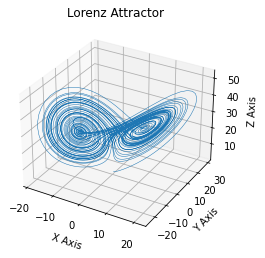

In [17]:
plot_attractor(attractor)

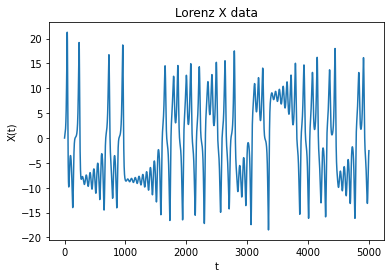

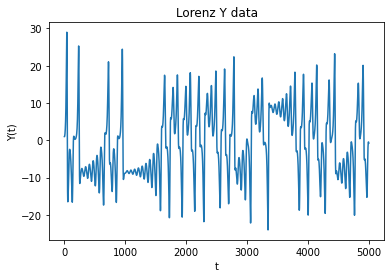

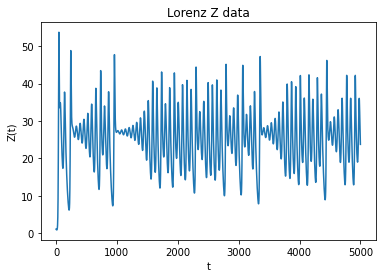

In [18]:
plt.plot(attractor[0])
plt.title("Lorenz X data")
plt.ylabel("X(t)")
plt.xlabel("t")
plt.show()

plt.plot(attractor[1])
plt.title("Lorenz Y data")
plt.ylabel("Y(t)")
plt.xlabel("t")
plt.show()

plt.plot(attractor[2])
plt.title("Lorenz Z data")
plt.ylabel("Z(t)")
plt.xlabel("t")
plt.show()

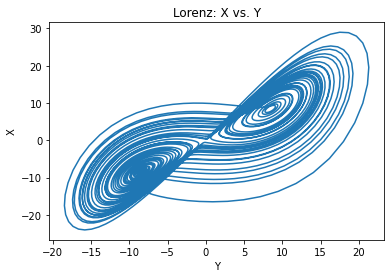

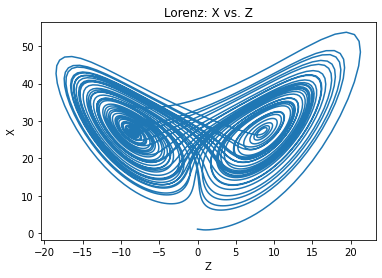

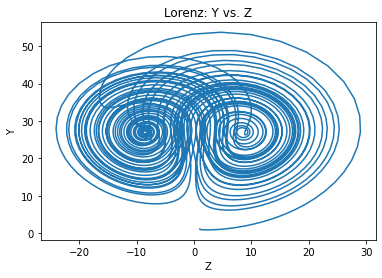

In [19]:


plt.plot(attractor[0], attractor[1])
plt.title("Lorenz: X vs. Y")
plt.ylabel("X")
plt.xlabel("Y")
plt.show()

plt.plot(attractor[0], attractor[2])
plt.title("Lorenz: X vs. Z")
plt.ylabel("X")
plt.xlabel("Z")
plt.show()

plt.plot(attractor[1], attractor[2])
plt.title("Lorenz: Y vs. Z")
plt.ylabel("Y")
plt.xlabel("Z")
plt.show()


## 4. Building a datastream from the Attractor 

In [20]:
# Sparse Sampling
n = 5000
interval = 50
attractor = evolve_system(num_steps = n)

In [23]:
sample_index = np.arange(0, n, interval) 
sample = np.empty((len(sample_index),3))

for i in range(len(sample_index)):
    
    sample[i] = (attractor[0][sample_index[i]], attractor[1][sample_index[i]], attractor[2][sample_index[i]])

C:\Users\mchuf\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  after removing the cwd from sys.path.


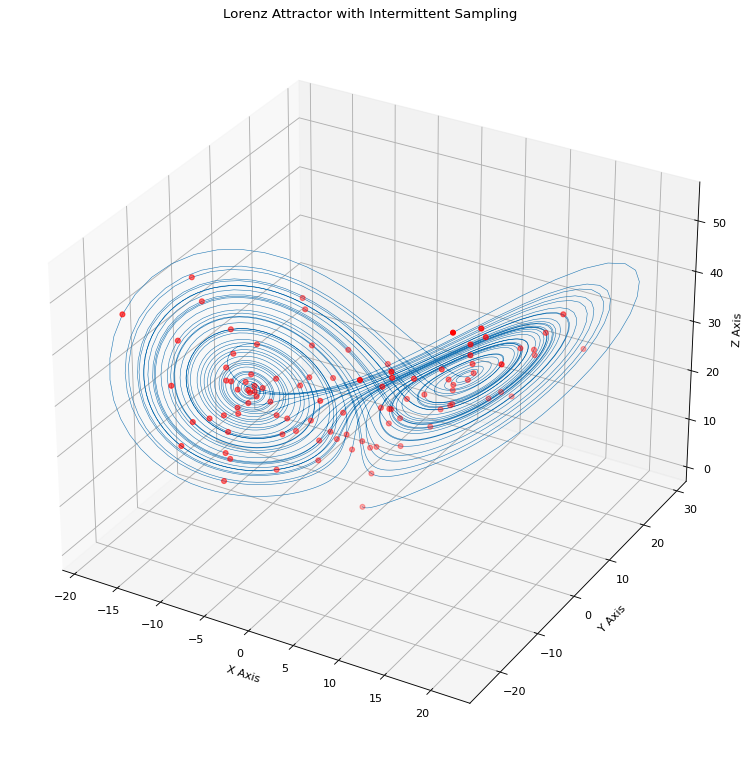

In [24]:
attractor = evolve_system(num_steps = n)
# Plot
fig = plt.figure(figsize=(12, 12), dpi=80)
ax = fig.gca(projection='3d')

ax.plot(attractor[0], attractor[1], attractor[2], lw=0.5)
ax.scatter(sample[:,0], sample[:,1], sample[:,2], c='r')
# for i in range(len(sample)):
#     xs = sample[i, 0]
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zlow, zhigh)
#     ax.scatter(xs, ys, zs, marker=m)
    
# ax.plot(sample[0], sample[1], sample[2])
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor with Intermittent Sampling")

plt.show()

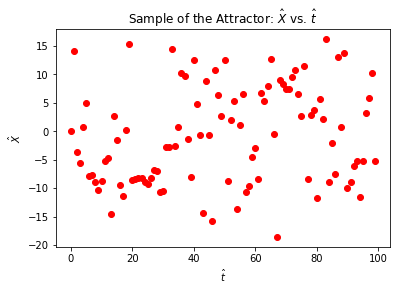

In [25]:
plt.scatter(np.arange(0, len(sample), 1) ,sample[:,0], c = 'r')
plt.title("Sample of the Attractor: $\hat{X}$ vs. $\hat{t}$")
plt.ylabel("$\hat{X}$")
plt.xlabel("$\hat{t}$")
plt.show()

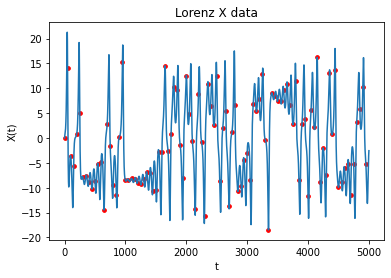

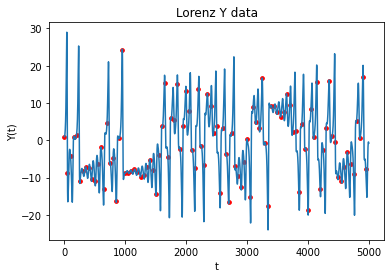

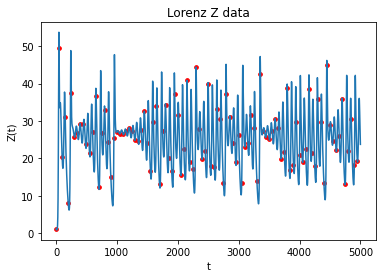

In [26]:
n = 5000

plt.plot(attractor[0])
plt.scatter(sample_index,sample[:, 0], color='r', marker = ".",s = 55)
plt.title("Lorenz X data")
plt.ylabel("X(t)")
plt.xlabel("t")
plt.show()

# ax.plot(LIBR[1],LIBR[0][:,i], color = 'blue', marker = "s", markersize = 0, markerfacecolor='None', markeredgecolor='black', linestyle="-", linewidth=.4 )

plt.plot(attractor[1])
plt.scatter(sample_index,sample[:, 1], color='r', marker = ".",s = 55)
plt.title("Lorenz Y data")
plt.ylabel("Y(t)")
plt.xlabel("t")
plt.show()

plt.plot(attractor[2])
plt.scatter(sample_index,sample[:, 2], color='r', marker = ".",s = 55)
plt.title("Lorenz Z data")
plt.ylabel("Z(t)")
plt.xlabel("t")
plt.show()

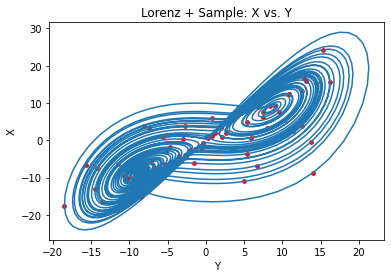

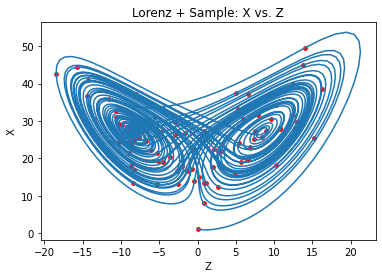

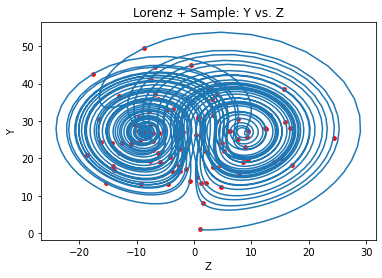

In [27]:
plt.plot(attractor[0], attractor[1])
plt.scatter(sample[:, 0],sample[:, 1], color='r', marker = ".",s = 55)
plt.title("Lorenz + Sample: X vs. Y")
plt.ylabel("X")
plt.xlabel("Y")
plt.show()

plt.plot(attractor[0], attractor[2])
plt.scatter(sample[:, 0],sample[:, 2], color='r', marker = ".",s = 55)
plt.title("Lorenz + Sample: X vs. Z")
plt.ylabel("X")
plt.xlabel("Z")
plt.show()

plt.plot(attractor[1], attractor[2])
plt.scatter(sample[:, 1],sample[:, 2], color='r', marker = ".",s = 55)
plt.title("Lorenz + Sample: Y vs. Z")
plt.ylabel("Y")
plt.xlabel("Z")
plt.show()


# What can we do with the sample?

In [40]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.linalg import hankel


In [41]:
# Sparse Sampling
n = 50000
interval = 50
attractor = evolve_system(num_steps = n)
sample_index = np.arange(0, n, interval) 
sample = np.empty((len(sample_index),3))

for i in range(len(sample_index)):
    
    sample[i] = (attractor[0][sample_index[i]], attractor[1][sample_index[i]], attractor[2][sample_index[i]])

In [42]:
sample

array([[ 0.        ,  1.        ,  1.05      ],
       [14.03679248, -8.64131643, 49.55647821],
       [-3.57652915, -4.09800259, 20.34537967],
       ...,
       [-0.9144553 ,  5.81522308, 29.25582723],
       [11.54833195,  7.60548806, 34.92483617],
       [ 7.63226562, 12.4595832 , 16.76278677]])

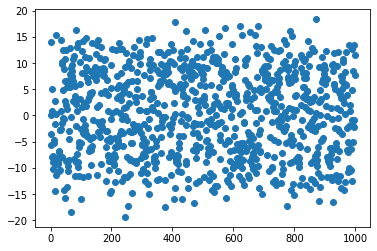

In [43]:
plt.scatter(np.arange(0, len(sample), 1) ,sample[:,0])

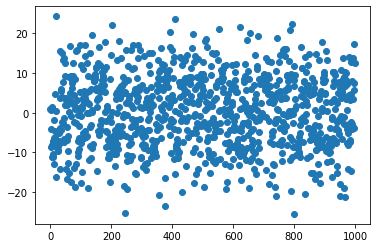

In [44]:
plt.scatter(np.arange(0, len(sample), 1) ,sample[:,1])

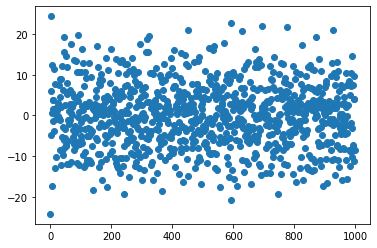

In [45]:
plt.scatter(np.arange(0, len(sample), 1) ,sample[:,2]-np.mean(sample[:,2]))

In [46]:
def checkHankel(A):
    """
    Hankel Sanity Check
    """
    if A.shape[0] < A.shape[1]:
        n = A.shape[0]
    else:
        n = A.shape[1]
        
    for i in range( 0, n):
        for j in range( 0, n):
            if (i + j < n):
                if (A[i][j] != A[i + j][0]):
                    return False
            else :
                if (A[i][j] !=
                    A[i + j - n + 1][n - 1]):
                    return False             
    return True


In [47]:

X = hankel(sample)


In [48]:
X.shape

(3000, 3000)

In [49]:
checkHankel(X)

True

In [50]:
U, S, VT = np.linalg.svd(X,full_matrices=False)

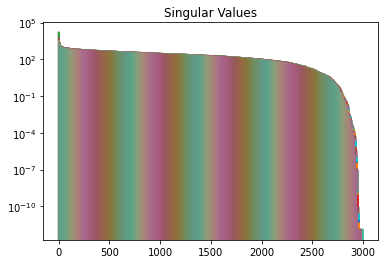

In [51]:
#@title
#Take a look at singular values

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

Given a set of streaming data, can we: \
-Forecast future points\
-Predict other variables (z, y)\
-Interpolate\


## 5. Recreating an Attractor (Taken's Embedding Theorem)

Taken's Embedding Theorem:

(Formally):

Let M be a compact manifold of dimension $m$. For pairs $(\phi, y)$ where $\phi: M \rightarrow M$ is a smooth diffeomorphism (an invetible function that maps one differentiable manifold to another such that both the function and its inverse are smooth) and $y: M \rightarrow \mathbb{R}$ is a smooth function, it is a generic property that the $(2m + 1)$ -- delay observation map $\Phi_{(\phi, y)}: M \rightarrow \mathbb{R}^{2m + 1}$ given by


$\Phi_{(\phi, y)}(x) = (y(x), y\cdot \phi(x),..., y\cdot \phi^{2m}(X))$

is an embedding; by 'smooth' we mean at least $C^2$.

(Informally):

With only measurements of one dimesion of our attractor, with delay embeddings, we can produce a topologically equivalent structure to the original attractor.


Sources:

1. Selecting $\tau$: "Although the theory implies that an arbitrary time delay is sufficient to reconstruct the attractor, efficiency with a limited amount of data is enhanced by particular choices of the time delay"

    -Fraser, A.M., Swinney, H.L. (1986) Independent coordinates for strange attractors from mutual information. Physical Review A 33:1134-1140
    

2. Determining dimensionality of the phase space: "Further, in the absence of knowledge of the phase space dimension n, a choice of the number of embedding dimensions m must also be made. "

    -Kennel, M and Abarbanel, H. (2002) Physical Review E 66: 026209


3. Applications of embedding time-series data:


    -Ott, E., Sauer, T, Yorke, J.A. (1994) Coping with Chaos: Analysis of Chaotic Data and the Exploitation of Chaotic Systems. New York:Wiley Interscience



In [131]:
# Sparse Sampling
n = 5000
interval = 50
attractor = evolve_system(num_steps = n)
sample_index = np.arange(0, n, interval) 
sample = np.empty((len(sample_index),3))

for i in range(len(sample_index)):
    
    sample[i] = (attractor[0][sample_index[i]], attractor[1][sample_index[i]], attractor[2][sample_index[i]])

In [132]:
len(sample[:,0])

100

In [143]:
tau = 2
data = sample[:,0]
data_lag0 = data[:].flatten()
data_lag1 = np.roll(data, -tau)[:].flatten()
data_lag2 = np.roll(data, -2 * tau)[:].flatten()

C:\Users\mchuf\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


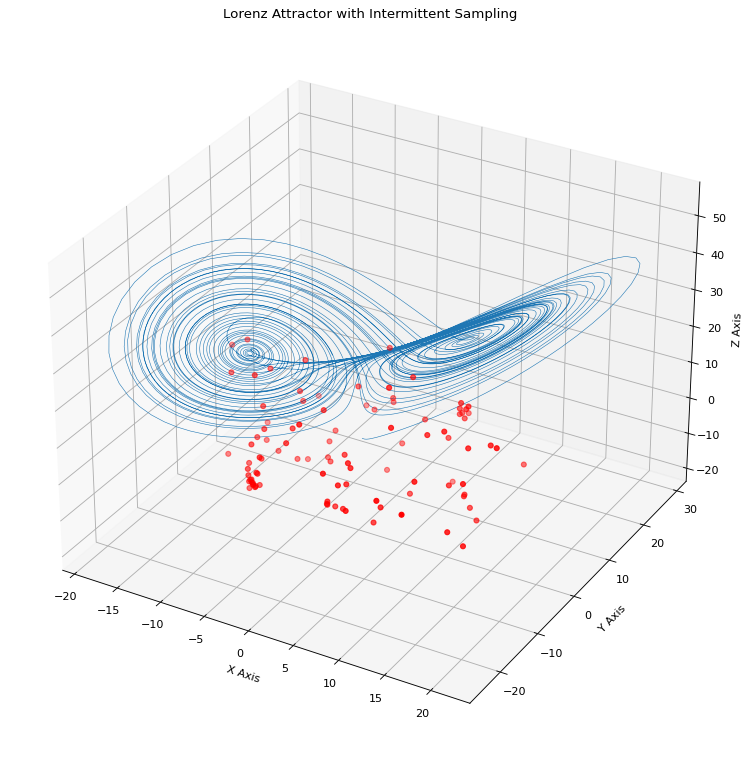

In [144]:
fig = plt.figure(figsize=(12, 12), dpi=80)
ax = fig.gca(projection='3d')

ax.plot(attractor[0], attractor[1], attractor[2], lw=0.5)
ax.scatter(data_lag0, data_lag1, data_lag2, c='r')
# for i in range(len(sample)):
#     xs = sample[i, 0]
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zlow, zhigh)
#     ax.scatter(xs, ys, zs, marker=m)
    
# ax.plot(sample[0], sample[1], sample[2])
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor with Intermittent Sampling")

plt.show()